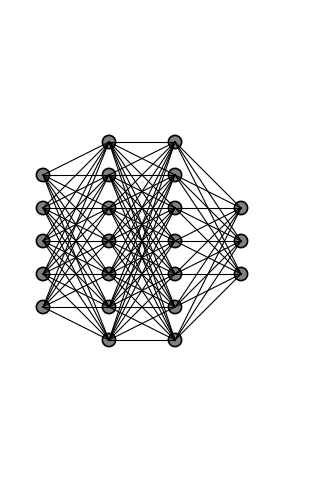

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_network(ax, layer_sizes):
    """
    Draw a simple feedforward neural network diagram.
    
    Parameters:
    - ax: Matplotlib axis object.
    - layer_sizes: List with the number of neurons in each layer.
    """
    v_spacing = 1.0  # Vertical spacing
    h_spacing = 2.0  # Horizontal spacing
    
    # Calculate layer coordinates
    layer_coords = []
    for i, layer_size in enumerate(layer_sizes):
        x = i * h_spacing  # X coordinate based on layer index
        y_start = -0.5 * (layer_size - 1) * v_spacing  # Center vertically
        y_coords = np.linspace(y_start, -y_start, layer_size)
        layer_coords.append((x, y_coords))

    # Draw connections
    for (x1, y1_list), (x2, y2_list) in zip(layer_coords[:-1], layer_coords[1:]):
        for y1 in y1_list:
            for y2 in y2_list:
                ax.plot([x1, x2], [y1, y2], 'k-', lw=0.8)  # Black lines for connections

    # Draw neurons
    for x, y_list in layer_coords:
        for y in y_list:
            ax.add_patch(plt.Circle((x, y), 0.2, color='gray', ec='black', lw=1.2))

    # Adjust limits
    ax.set_xlim(-1, len(layer_sizes) * h_spacing)
    ax.set_ylim(-max(layer_sizes), max(layer_sizes))
    ax.set_aspect('equal')
    ax.axis('off')  # Hide axes

# Define layer sizes (Input, Hidden Layers, Output)
layer_sizes = [5, 7, 7, 3]  # Example: 5 input, 2 hidden layers (7 neurons each), 3 outputs

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 6))
draw_neural_network(ax, layer_sizes)

# Show the neural network diagram
plt.show()

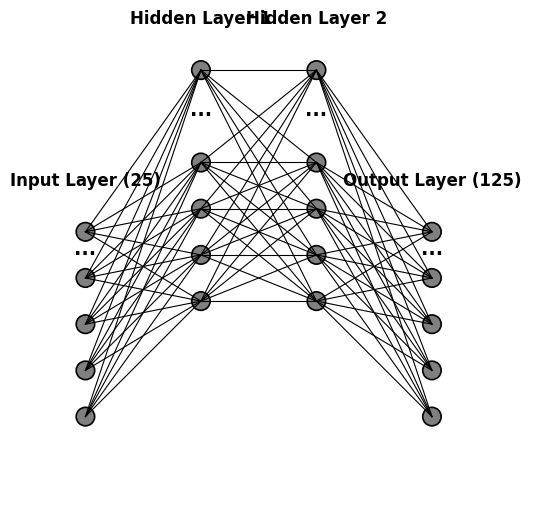

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw_neural_network(ax, layer_sizes, labels):
    """
    Draw an abstracted feedforward neural network diagram.
    
    Parameters:
    - ax: Matplotlib axis object.
    - layer_sizes: List with the number of neurons in each layer.
    - labels: List of labels for each layer.
    """
    v_spacing = 1.0  # Vertical spacing
    h_spacing = 2.5  # Horizontal spacing
    
    layer_coords = []
    
    # Function to get abstracted neuron positions (first 4, last 1)
    def get_abstracted_positions(layer_size):
        if layer_size > 6:  # Abstract large layers
            return np.array([0.5, 1.5, 2.5, 3.5, 5.5]) * v_spacing
        else:
            return np.linspace(-0.5 * (layer_size - 1) * v_spacing,
                               0.5 * (layer_size - 1) * v_spacing,
                               layer_size)
    
    # Calculate neuron positions
    for i, layer_size in enumerate(layer_sizes):
        x = i * h_spacing  # X coordinate based on layer index
        y_coords = get_abstracted_positions(layer_size)
        layer_coords.append((x, y_coords))
    
    # Draw connections
    for (x1, y1_list), (x2, y2_list) in zip(layer_coords[:-1], layer_coords[1:]):
        for y1 in y1_list:
            for y2 in y2_list:
                ax.plot([x1, x2], [y1, y2], 'k-', lw=0.8)  # Black lines for connections

    # Draw neurons
    for x, y_list in layer_coords:
        for y in y_list:
            ax.add_patch(plt.Circle((x, y), 0.2, color='gray', ec='black', lw=1.2))

    # Add labels to layers
    for i, (x, y_list) in enumerate(layer_coords):
        ax.text(x, max(y_list) + 1, labels[i], ha='center', fontsize=12, fontweight='bold')

    # Add "..." for large layers
    for i, (x, y_list) in enumerate(layer_coords):
        if len(y_list) == 5:  # If abstracted
            ax.text(x, (y_list[3] + y_list[4]) / 2, "...", ha='center', fontsize=14, fontweight='bold')

    # Adjust limits
    ax.set_xlim(-1, len(layer_sizes) * h_spacing)
    ax.set_ylim(-4, 6)
    ax.set_aspect('equal')
    ax.axis('off')  # Hide axes

# Define abstracted layer sizes (actual sizes: 25 -> 5, Hidden layers -> same, 125 -> 5)
layer_sizes = [5, 7, 7, 5]  
labels = ["Input Layer (25)", "Hidden Layer 1", "Hidden Layer 2", "Output Layer (125)"]

# Create figure and axis
fig, ax = plt.subplots(figsize=(9, 6))
draw_neural_network(ax, layer_sizes, labels)

# Show the neural network diagram
plt.show()